In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [2]:
class neuralNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        #задаю количество узлов в слоях
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        #коэффицент обучения
        self.lr=learningrate
        
        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),size=(self.hnodes,self.inodes))
        self.woh=numpy.random.normal(0.0,pow(self.onodes,-0.5),size=(self.onodes,self.hnodes))
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    def train(self,inputs_list,targets_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        targets = numpy.array(targets_list,ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.woh,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.woh.T,output_errors)
        
        self.woh += self.lr * numpy.dot((output_errors * final_outputs 
                                         * (1.0-final_outputs)),numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors*hidden_outputs 
                                         * (1.0-hidden_outputs)),numpy.transpose(inputs))
        pass
    def query(self,inputs_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.woh,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
        pass
    def __str__(self):
        return "inodes=" + str(self.inodes) + "\nhnodes=" + str(self.hnodes) + "\nonodes=" + str(self.onodes) + "\nwih=\n" + str(self.wih) +"\nwoh=\n" + str(self.woh)

In [7]:
input_nodes=784
hidden_nodes=100
output_nodes=10
learning_rate=0.3
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

training_data_file = open("./mnist_train.csv",'r')
train_data_list = training_data_file.readlines()
training_data_file.close()
for record in train_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] =0.99
    n.train(inputs,targets)
    pass

In [11]:
test_data_file = open("./mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
all_values = test_data_list[67].split(',')
print(all_values[0])

4


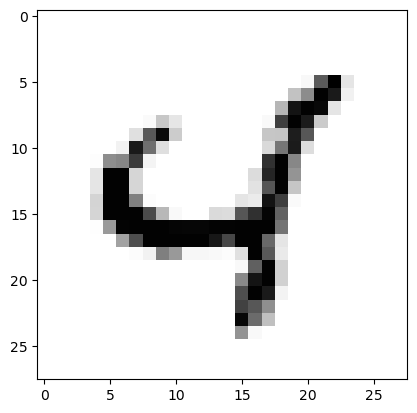

In [12]:
image_array = numpy.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

In [14]:
n.query((numpy.asfarray(all_values[1:])/ 255.0 * 0.99)+0.01)

array([[1.23654394e-02],
       [4.70974111e-03],
       [6.84569449e-03],
       [8.25330228e-04],
       [9.95127545e-01],
       [1.45062306e-02],
       [1.31175186e-02],
       [2.04038579e-03],
       [3.45297343e-03],
       [6.86387023e-03]])